In [1]:
from MultiSS_SpectrumConfig import SpectrumConfig, DataImportConfig
from MultiSS_SpectrumCalculaotr import SpectrumCalculator
from MultiSS_CrossConfig import CrossConfig
from MultiSS_PlotConfig import PlotConfig
from MultiSS_SpectrumPlotter import SpectrumPlotter

import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = int(1e6)
data1 = np.sin(np.linspace(0, 50000*np.pi, N)) + 3
data2 = np.cos(np.linspace(0, 50000*np.pi, N)) + 3
data3 = np.random.rand(N)

config1 = DataImportConfig(data=data1)
config2 = DataImportConfig(data=data2)
config3 = DataImportConfig(data=data3)

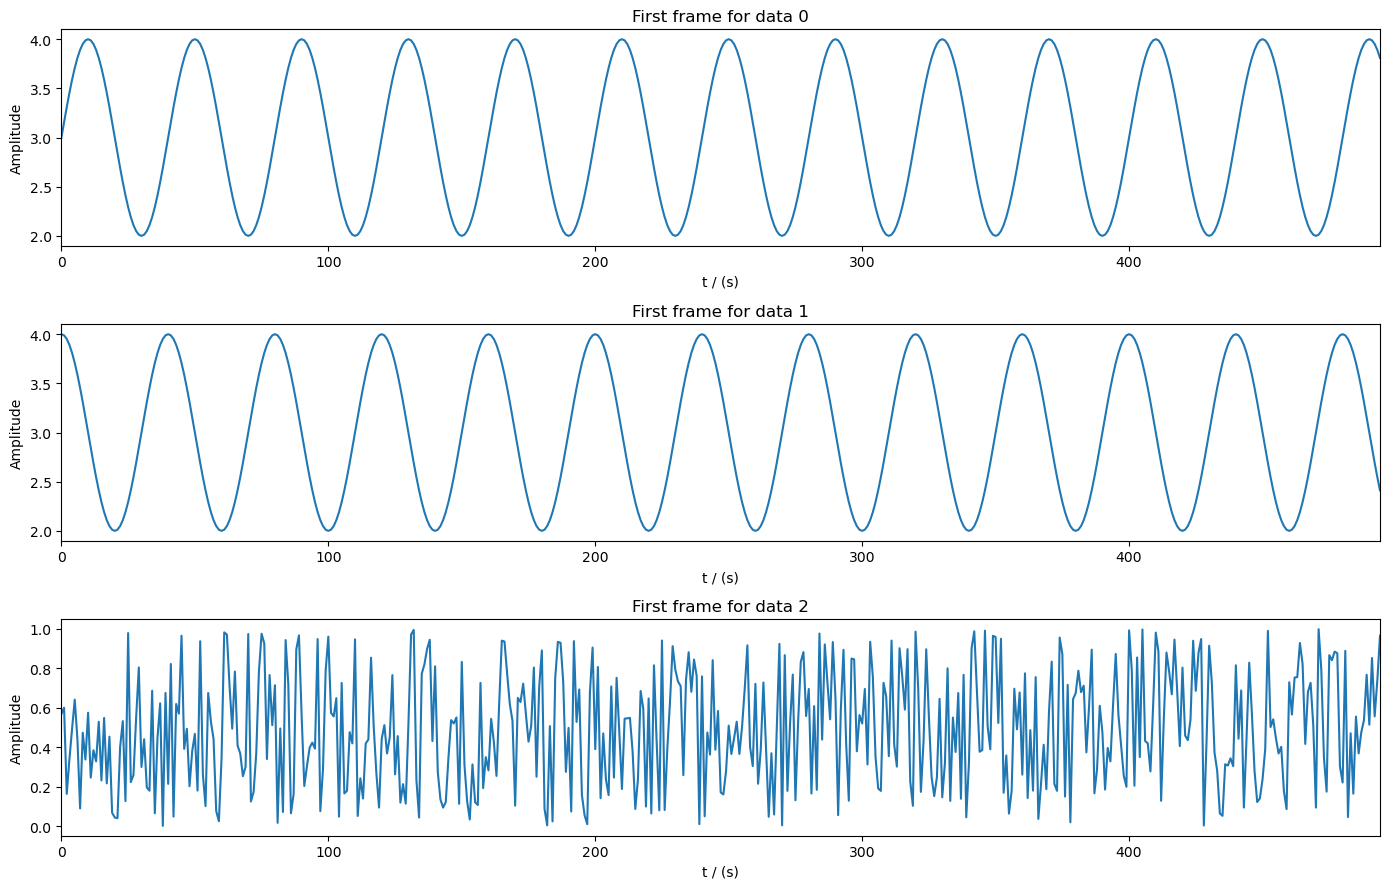

  0%|          | 0/202 [00:00<?, ?it/s]

In [9]:
sconfig = SpectrumConfig(dt=1, f_min=-0.1, f_max=0.1, f_unit='Hz', backend='cpu', order_in=[1, 2], spectrum_size=100, show_first_frame=True)
selected_data = [0, 1, 2]
cconfig = CrossConfig(cross_corr_2=[(1, 0), (0, 1), (2, 1)])
scalc = SpectrumCalculator(sconfig, cconfig, [config1, config2, config3], selected=selected_data)
scalc.calc_spec();

+---------------+--------------------+------------------------+
| Dataset Index |         S1         |        Error S1        |
+---------------+--------------------+------------------------+
|      0.0      | 2.9999999421575927 |          0.0           |
|      1.0      | 3.000000044888668  | 1.4901161415892261e-09 |
|      2.0      | 0.5001266358516779 | 0.00012076421262463555 |
+---------------+--------------------+------------------------+


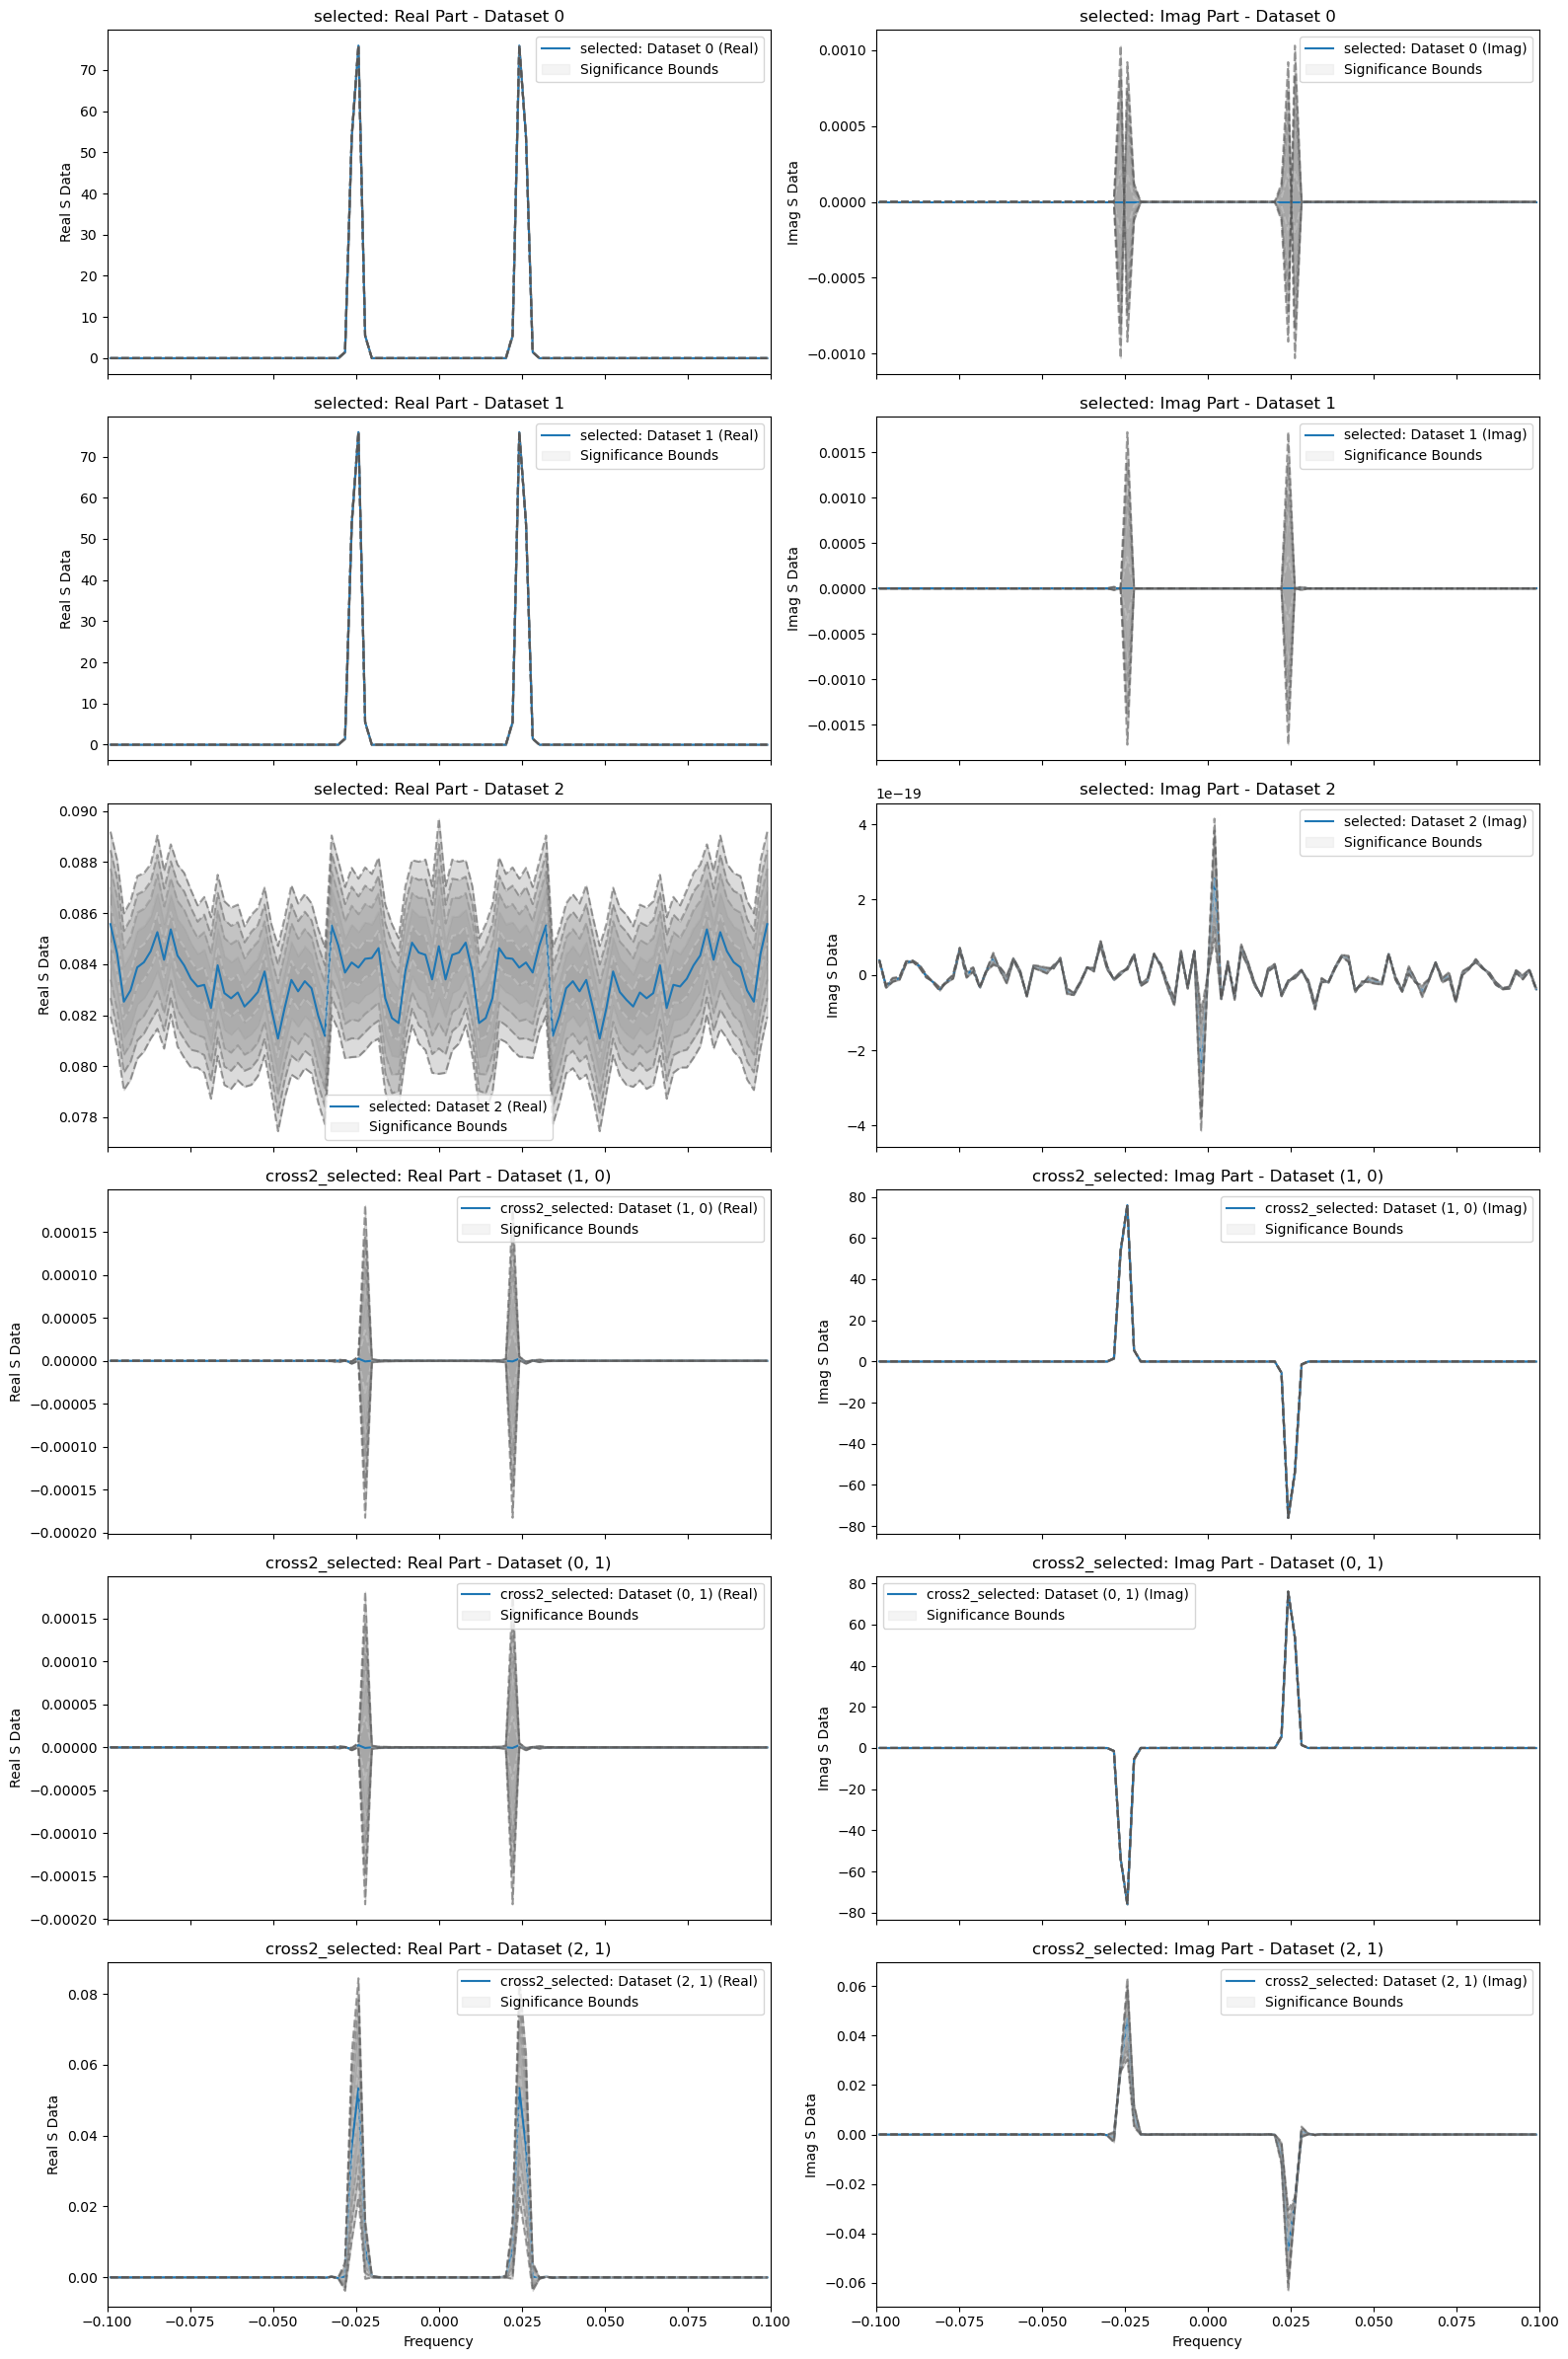


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|     False      |     N/A      |
+----------------+--------------+


In [13]:
pconfig = PlotConfig(f_min=-0.1, f_max=0.1, display_orders=None, significance=5, arcsinh_scale=(False, 0.02), plot_format=['re', 'im'])
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()

+---------------+--------------------+------------------------+
| Dataset Index |         S1         |        Error S1        |
+---------------+--------------------+------------------------+
|      0.0      | 2.9999999965934756 |          0.0           |
|      1.0      | 3.000000043283973  | 2.8190934244776145e-05 |
|      2.0      | 0.5000127815030061 | 0.00012875381798949093 |
+---------------+--------------------+------------------------+


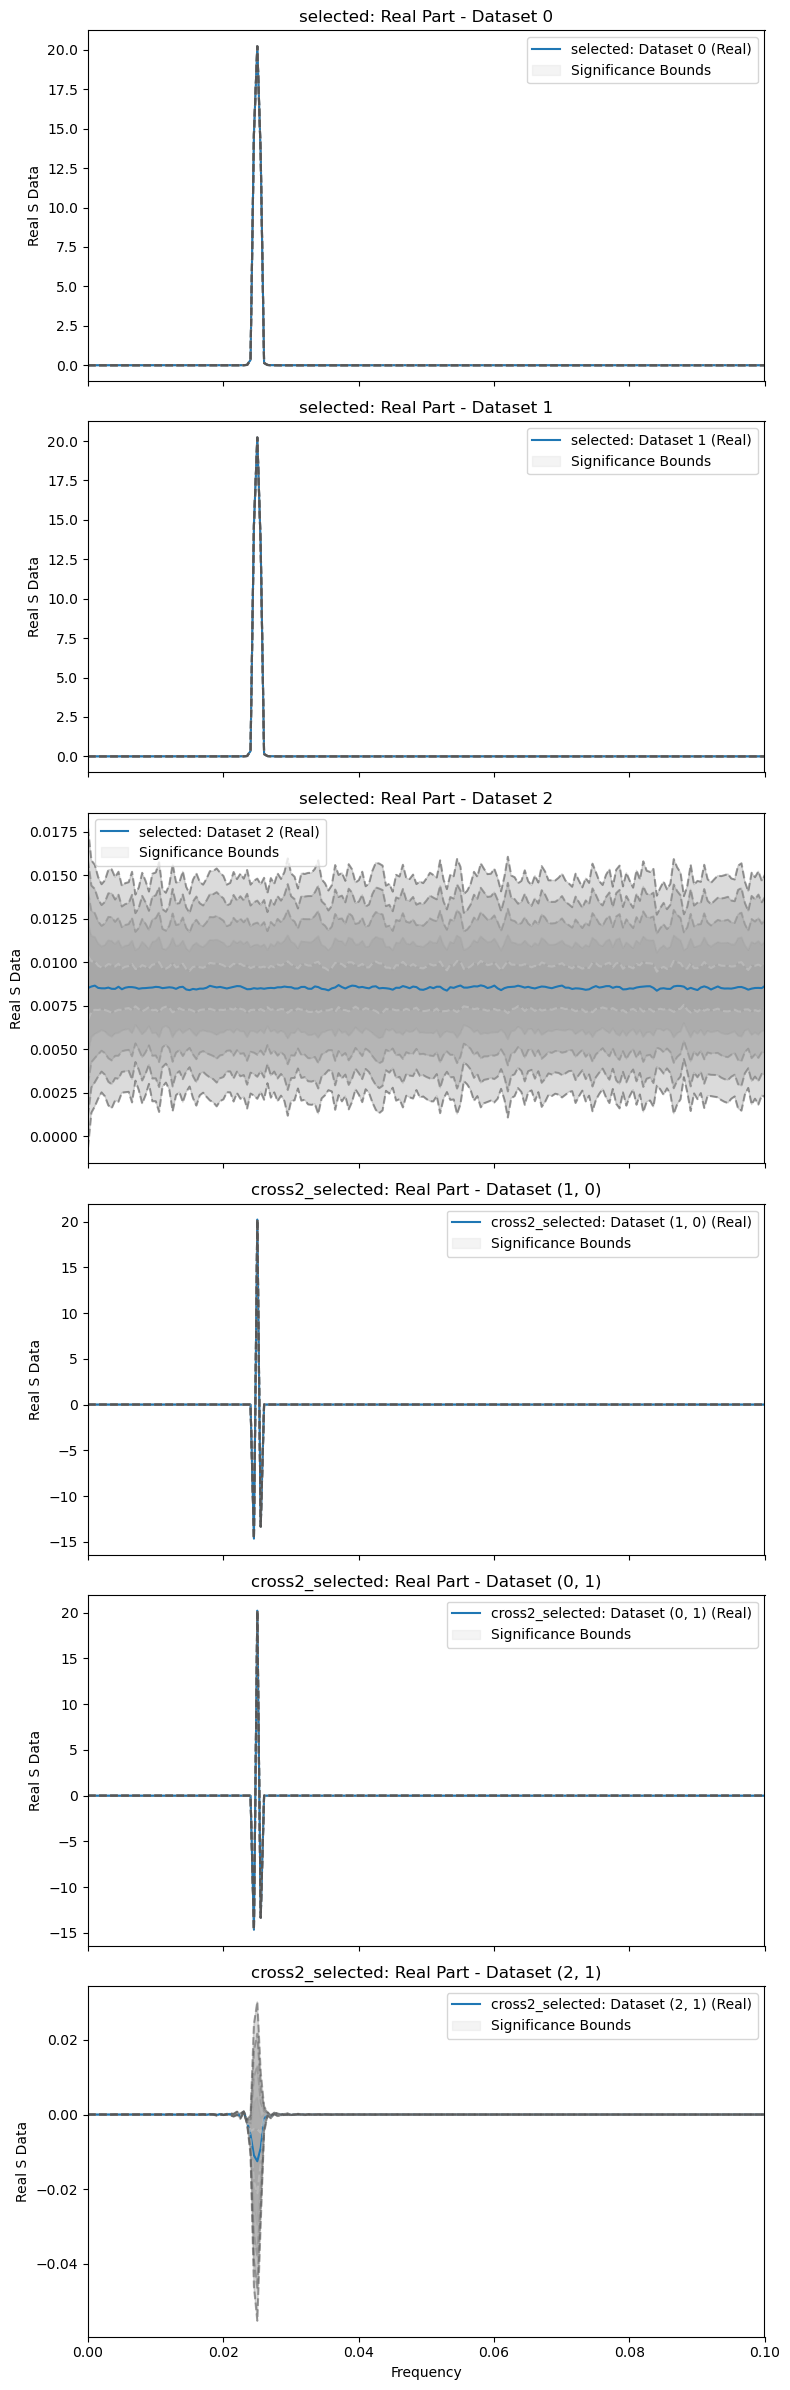


S2 Scaling Information:
+----------------+--------------+
| Arcsinh Scaled | Scale Factor |
+----------------+--------------+
|      True      |     0.02     |
+----------------+--------------+


In [11]:
pconfig = PlotConfig(f_min=0, f_max=0.1, display_orders=None, significance=5, arcsinh_scale=(True, 0.02), plot_format=['re'])
plotter = SpectrumPlotter(sconfig, cconfig, scalc, pconfig)
plotter.display()

In [26]:
# Define the HDF5 file path
hdf5_file_path = "test_data.h5"
config1 = DataImportConfig(path=hdf5_file_path, group_key="group1", dataset="data1")
#config2 = DataImportConfig(path=hdf5_file_path, group_key="group2", dataset="data2")

m_var values have been changed. old:10, new: 55


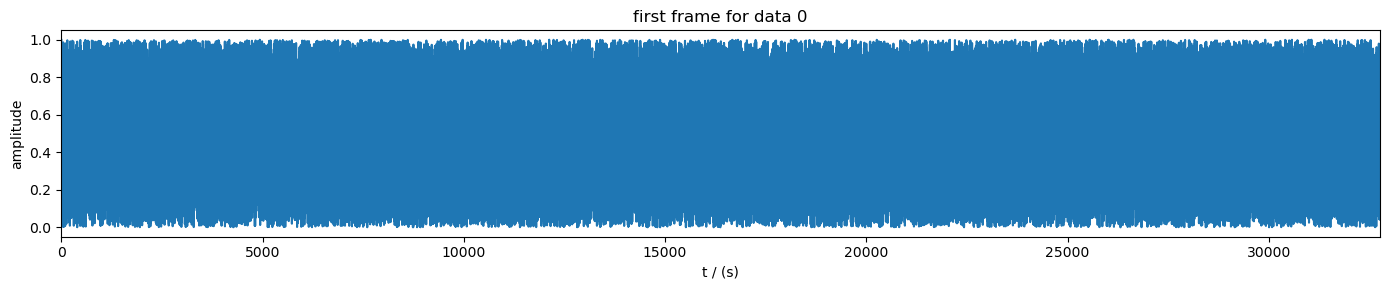

  0%|          | 0/55 [00:00<?, ?it/s]

Execution time: 20.2880 seconds


In [202]:
import time

start_time = time.time()
sconfig = SpectrumConfig(dt=1, f_unit='Hz', backend='cpu', order_in=[2], spectrum_size=16384, show_first_frame=True, m=360)
cconfig = CrossConfig(auto_corr=True, cross_corr_2=None)
scalc = SpectrumCalculator(sconfig, cconfig, [config1], selected=None)
scalc.calc_spec();
end_time = time.time()
print(f"Execution time: {end_time - start_time:.4f} seconds")

In [23]:
scalc